### Quantitative Stock Analysis Integrating Information Theory with Machine Learning for Market Prediction

***
In this project, I delved into the realm of Information Theory to enhance our understanding of stock market dynamics. By calculating mutual information, I quantified the extent to which knowledge of one stock's movement informs us about another, offering valuable insights into stock interdependencies. Additionally, I employed entropy as a measure to understand the unpredictability or the degree of randomness in stock price movements, further enriching our analysis.

Furthermore, to evaluate the performance of the trained model, I utilized the Receiver Operating Characteristic (ROC) curve. This statistical tool is pivotal in assessing the model's predictive accuracy, particularly in distinguishing between different classes of outcomes. The ROC curve, by illustrating the trade-off between true positive rate and false positive rate, provided a comprehensive view of the model's effectiveness, making it a robust tool for evaluating the predictive capabilities in the context of stock price movements.

Overall, this multifaceted approach, combining Information Theory concepts with traditional statistical evaluation methods, offered a comprehensive and nuanced understanding of stock market behavior and the predictive power of the employed model.

***
***
The libraries that I used for this

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc


Import dataset

In [43]:
df = pd.read_csv("dataset.csv")
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


***
In this section, I processed stock data by setting dates as the index and calculated daily returns to understand day-to-day fluctuations. I also computed 7-day moving averages to observe short-term trends. Descriptive statistics provided an overview of the data's distribution. Through various plots—line graphs for stock prices and daily returns, histograms for return distributions, and box plots for identifying outliers—I visually explored the data's characteristics and relationships. Finally, I examined both descriptive statistics and the correlation matrix of daily returns for deeper insights into stock behaviors and interdependencies.

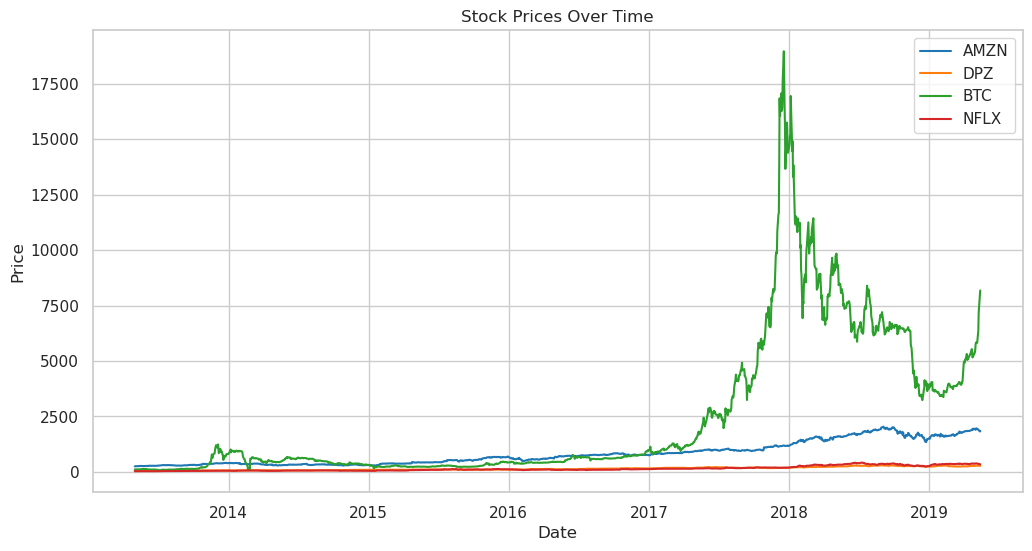

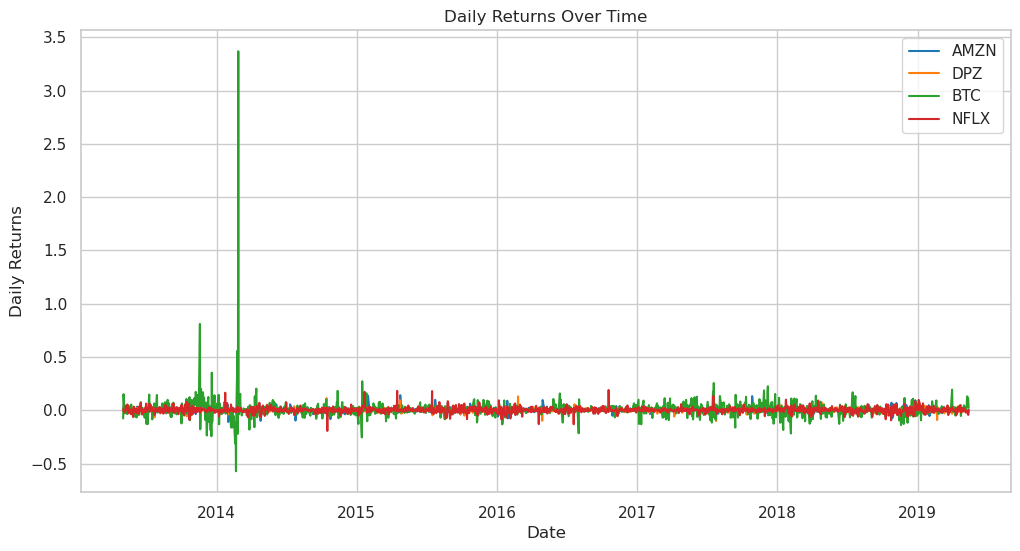

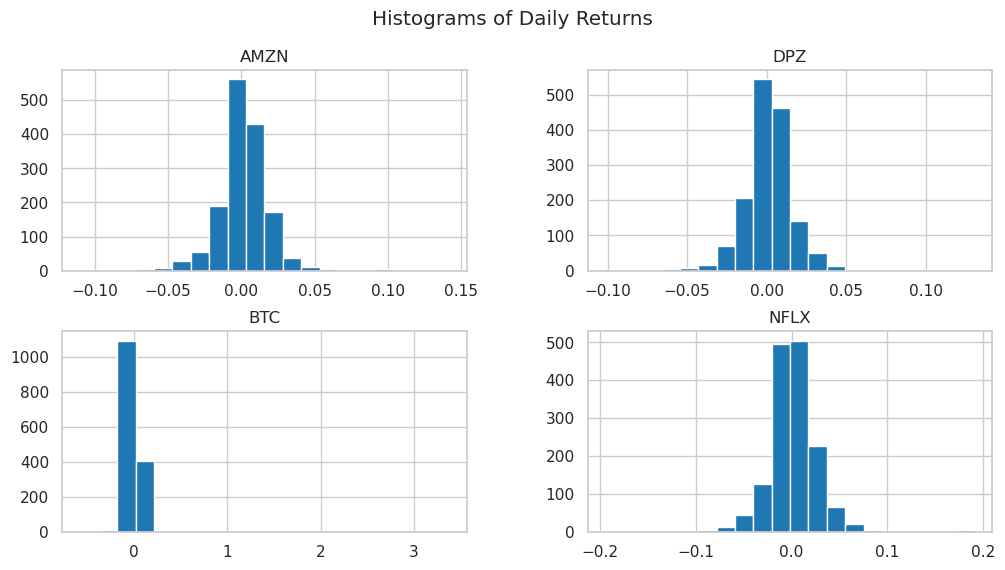

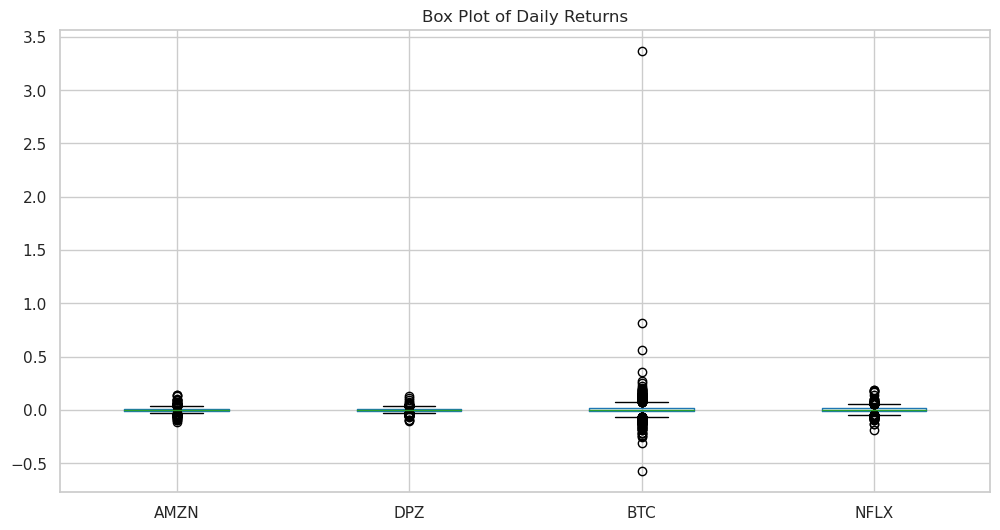

(              AMZN          DPZ           BTC         NFLX
 count  1520.000000  1520.000000   1520.000000  1520.000000
 mean    821.541810   146.771695   2421.465669   147.668273
 std     518.442653    72.192287   3310.894199   107.641486
 min     248.229996    51.190983     69.660004    29.464285
 25%     364.360001    84.993593    340.904999    62.851071
 50%     686.459992   127.168053    625.304993   104.000000
 75%    1121.287536   202.454994   3874.912415   192.207496
 max    2039.510010   298.635986  18972.320310   418.970001,
           AMZN       DPZ       BTC      NFLX
 AMZN  1.000000  0.310769 -0.005636  0.440908
 DPZ   0.310769  1.000000  0.015646  0.251107
 BTC  -0.005636  0.015646  1.000000  0.002442
 NFLX  0.440908  0.251107  0.002442  1.000000)

In [44]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate daily returns
daily_returns = df.pct_change()

# Calculate moving averages (7-day)
moving_averages = df.rolling(window=7).mean()

# Descriptive statistics
stats = df.describe()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df, label=df.columns)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_returns, label=daily_returns.columns)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

# Histograms for daily returns
daily_returns.hist(bins=20, figsize=(12, 6))
plt.suptitle('Histograms of Daily Returns')
plt.show()

# Box plots for daily returns
daily_returns.boxplot(figsize=(12, 6))
plt.title('Box Plot of Daily Returns')
plt.show()

stats, daily_returns.corr()  # Descriptive statistics and correlation matrix



In this segment, I calculated the entropy for each stock (AMZN, DPZ, BTC, NFLX) using the entropy function from scipy.stats. Entropy, in this context, quantifies the uncertainty or randomness in the distribution of each stock's prices. By measuring and printing the entropy values, I aimed to gain insights into the predictability and variability inherent in each stock's price movements.

In [45]:
from scipy.stats import entropy

# Calculate entropy for each stock
entropy_amzn = entropy(df['AMZN'])
entropy_dpz = entropy(df['DPZ'])
entropy_btc = entropy(df['BTC'])
entropy_nflx = entropy(df['NFLX'])

print("Entropy of AMZN:", entropy_amzn)
print("Entropy of DPZ:", entropy_dpz)
print("Entropy of BTC:", entropy_btc)
print("Entropy of NFLX:", entropy_nflx)


Entropy of AMZN: 7.138810839210741
Entropy of DPZ: 7.207265835380199
Entropy of BTC: 6.585973823026841
Entropy of NFLX: 7.084613265346992



The output represents the entropy values for each of the stocks: AMZN (Amazon), DPZ (Domino's Pizza), BTC (Bitcoin), and NFLX (Netflix). Entropy, in this context, is a measure from information theory that quantifies the uncertainty or randomness in the distribution of stock prices. Here's what these values imply:

**Entropy of AMZN: 7.1388**

This value suggests a certain level of unpredictability or randomness in Amazon's stock price movements. A higher entropy value generally indicates more randomness or less predictability.

**Entropy of DPZ: 7.2073**

Domino's Pizza's stock shows a slightly higher entropy than Amazon, implying a marginally higher level of uncertainty or complexity in its price changes.

**Entropy of BTC: 6.5860**

Bitcoin's entropy is lower compared to AMZN and DPZ. This suggests that Bitcoin's price changes might be somewhat more predictable or less complex than those of the mentioned stocks. However, it's important to note that a lower entropy doesn't necessarily mean low volatility; it's more about the predictability of the pattern of changes.

**Entropy of NFLX: 7.0846**

Netflix's entropy is closer to Amazon's, indicating a similar level of unpredictability or randomness in its stock price movements.
In summary, these entropy values provide a way to compare the degree of uncertainty or randomness in the price movements of different stocks. Stocks with higher entropy values are generally considered to have more unpredictable price movements. However, it's important to interpret these values in the context of each stock's behavior and market conditions, as entropy is just one of many metrics used in financial analysis.

***


In my analysis of stock relationships, I adopted a multifaceted approach to quantify and visualize mutual dependencies. Initially, I transformed the stock prices into daily returns to standardize comparisons across different scales. These returns were then discretized into quantile-based bins, facilitating their use in mutual information calculations, which are more effective with discrete categories. I applied mutual_info_score to measure mutual information among these discretized returns, offering insights into how much information about one stock can be inferred from another. Recognizing the inherent continuous nature of stock data, I also employed mutual_info_regression for a more nuanced understanding of these interdependencies. This method is better suited for continuous variables and captures both linear and non-linear relationships. Finally, the calculated mutual information values were visualized in a heatmap, providing an intuitive and comprehensive view of the interconnectedness among various stocks. This dual approach, encompassing both discrete and continuous perspectives, ensures a robust and thorough analysis of stock market dynamics.

In [48]:
def calculate_daily_returns(df):
    return df.pct_change().dropna()


def discretize_returns(returns, bins=10):
    discretized = pd.DataFrame(index=returns.index)
    for column in returns.columns:
        discretized[column] = pd.qcut(returns[column], q=bins, labels=False, duplicates='drop')
    return discretized



def calculate_mutual_information(df):
    columns = df.columns
    mi_matrix = pd.DataFrame(index=columns, columns=columns)
    for col1 in columns:
        for col2 in columns:
            mi_matrix.loc[col1, col2] = mutual_info_score(df[col1], df[col2])
    return mi_matrix

def plot_mutual_information_heatmap(df):
    columns = ['AMZN', 'DPZ', 'BTC', 'NFLX']
    mi_matrix = np.zeros((len(columns), len(columns)))

    # Calculate mutual information for each pair, including a variable with itself
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            mi = mutual_info_regression(df[[col1]], df[col2])[0]
            mi_matrix[i, j] = mi

    # Normalize the mutual information matrix
    max_mi = np.max(mi_matrix)  # Find the maximum MI value in the matrix
    mi_matrix_normalized = mi_matrix / max_mi  # Normalize the matrix values to [0, 1]

    # Plot the normalized mutual information matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(mi_matrix_normalized, annot=True, cmap='coolwarm',
                xticklabels=columns,
                yticklabels=columns, vmin=0, vmax=1)
    plt.title("Normalized Mutual Information Heatmap")
    plt.show()



mutual_information using mutual_info_score

          AMZN       DPZ       BTC      NFLX
AMZN  2.302583  0.109538  0.023047  0.188536
DPZ   0.109538  2.302583  0.036695  0.070376
BTC   0.023047  0.036695  2.302583  0.025191
NFLX  0.188536  0.070376  0.025191  2.302583

Mutual Information Heatmap



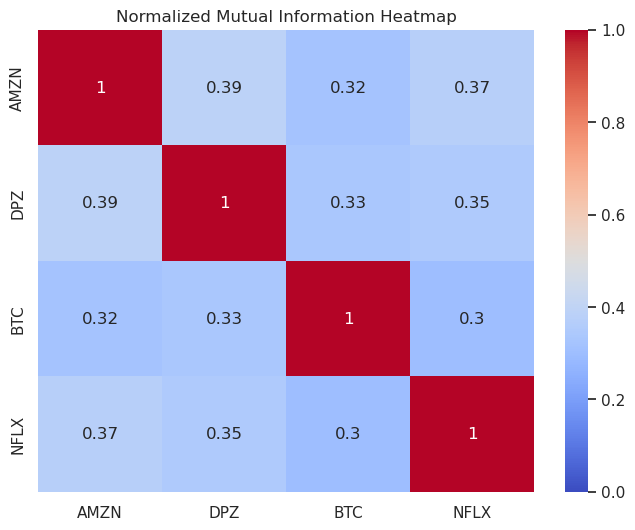

In [49]:
daily_returns = calculate_daily_returns(df)
discretized_returns = discretize_returns(daily_returns)
mutual_info = calculate_mutual_information(discretized_returns)

print("\nmutual_information using mutual_info_score\n")
print(mutual_info)
print("\nMutual Information Heatmap\n")
plot_mutual_information_heatmap(df)

****
This calculates and displays a correlation matrix for the closing prices of the stocks AMZN, DPZ, BTC, and NFLX, allowing for a quick assessment of how these stock prices are related to each other.

In [50]:
# Calculate the correlation between closing prices of different stocks
closing_prices_corr = df[['AMZN', 'DPZ', 'BTC', 'NFLX']].corr()
# Display the correlation matrix
print(closing_prices_corr)


          AMZN       DPZ       BTC      NFLX
AMZN  1.000000  0.972172  0.759802  0.980117
DPZ   0.972172  1.000000  0.708857  0.950453
BTC   0.759802  0.708857  1.000000  0.746428
NFLX  0.980117  0.950453  0.746428  1.000000


***
In this section, I've computed the daily percentage returns for selected stocks (AMZN, DPZ, BTC, NFLX) to assess their volatility and relative performance. NaN values, arising from days without trading or price changes, have been substituted with 0 for consistency. Utilizing Seaborn's visualization capabilities, I've created a scatter plot to specifically examine the relationship between AMZN and DPZ's daily returns. This visual representation, enhanced by a clear white grid style, effectively illustrates the correlation (or lack thereof) between these two stocks, offering insights into their co-movement patterns.

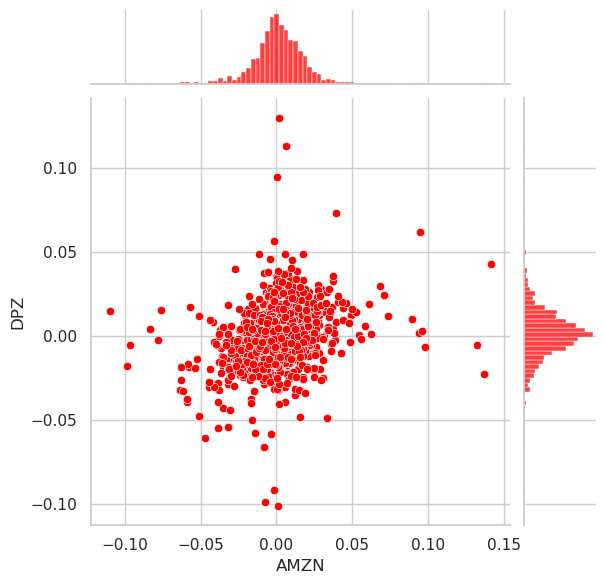

In [51]:
# Calculate daily percentage returns for the stocks
returns = df[['AMZN', 'DPZ', 'BTC', 'NFLX']].pct_change()

# Replace NaN values with 0
returns = returns.fillna(0)

# Set the style and context to improve appearance
sns.set_style("whitegrid")
sns.set_context("notebook", rc={"lines.linewidth": 1.5})

# Comparing AMZN to DPZ
sns.jointplot(x='AMZN', y='DPZ', data=returns, kind='scatter', color='red')

# Show the plot
plt.show()


***

I've calculated and analyzed the daily percentage returns for the stocks AMZN, DPZ, BTC, and NFLX, replacing any NaN values with zeros for consistency. To visually explore the relationships and correlations among these stocks, I've generated a Seaborn pairplot with regression lines, offering a clear and concise overview of how these stocks' returns compare and interact on a daily basis.

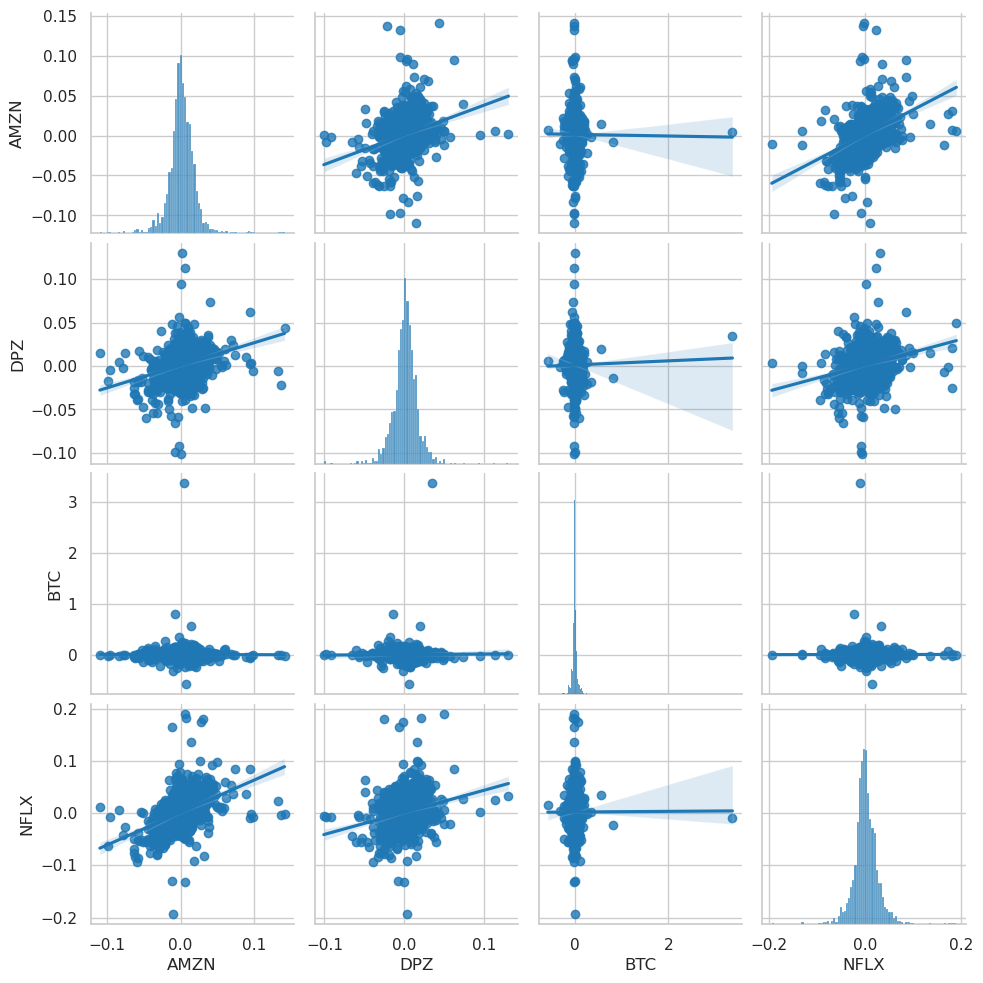

In [52]:
import seaborn as sns

# Calculate daily percentage returns for the stocks
returns = df[['AMZN', 'DPZ', 'BTC', 'NFLX']].pct_change()

# Replace NaN values with 0
returns = returns.fillna(0)

# Create a pairplot for the daily returns
sns.pairplot(returns, kind='reg')


***

In this segment of the analysis, I focused on leveraging a Long Short-Term Memory (LSTM) neural network to predict future stock prices based on historical data. After loading the data from "portfolio_data.csv", I normalized the stock prices of AMZN, DPZ, BTC, and NFLX using MinMaxScaler to ensure uniformity in scale. This step is crucial for effective neural network training.

I then created a time series dataset, with a specified look-back period (time_step) to prepare the input for the LSTM model. This approach allows the model to learn from sequences of historical data points. I chose a time step of 100, meaning the model looks at the last 100 data points to make a prediction.

The dataset was split into training and test sets, with 67% of the data used for training. I built the LSTM model, consisting of two LSTM layers and two Dense layers, to capture the complex patterns in the time series data. The model was compiled with the Adam optimizer and mean squared error as the loss function.

After training the model for 3 epochs, I used it to make predictions on the test set. The predicted prices represent the model's best guess for future stock prices based on the learned patterns from historical data. This method exemplifies the application of advanced machine learning techniques in financial market analysis, specifically for predictive modeling.

In [53]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import numpy as np

# Load the data
df = pd.read_csv("dataset.csv")

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['AMZN', 'DPZ', 'BTC', 'NFLX']])

# Function to create the time series data
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]
        X.append(a)
        y.append(dataset[i + time_step, :])
    return np.array(X), np.array(y)

# Create the time series data
time_step = 100  # Number of time steps you want to look back
X, y = create_dataset(scaled_data, time_step)

# Splitting the dataset into training and testing sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 4)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(4))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=3)

# Make predictions
predicted_prices = model.predict(X_test)



2024-02-11 16:04:50.432766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-11 16:04:50.434850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-11 16:04:50.436401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/3


2024-02-11 16:04:50.655855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-11 16:04:50.657131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-11 16:04:50.658431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

950/950 [==============================] - 71s 71ms/step - loss: 7.6641e-04
Epoch 2/3
950/950 [==============================] - 72s 76ms/step - loss: 2.5201e-04
Epoch 3/3
950/950 [==============================] - 76s 80ms/step - loss: 2.5768e-04


2024-02-11 16:08:30.590671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-11 16:08:30.592652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-11 16:08:30.594439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

15/15 [==============================] - 2s 45ms/step


***
In this phase of the project, I made predictions using the LSTM model and converted these predictions back to their original price scale. I evaluated the model's performance using Mean Squared Error (MSE) to quantify the difference between predicted and actual prices. For a more visual assessment, I plotted both actual and predicted prices of AMZN as an example, offering a clear comparison over time. This method can be replicated for other stocks like DPZ, BTC, and NFLX. Finally, I saved the trained model for future use, allowing for easy reloading and prediction on new data without the need for retraining.

15/15 [==============================] - 1s 61ms/step
Mean Squared Error: 0.013263958786970268


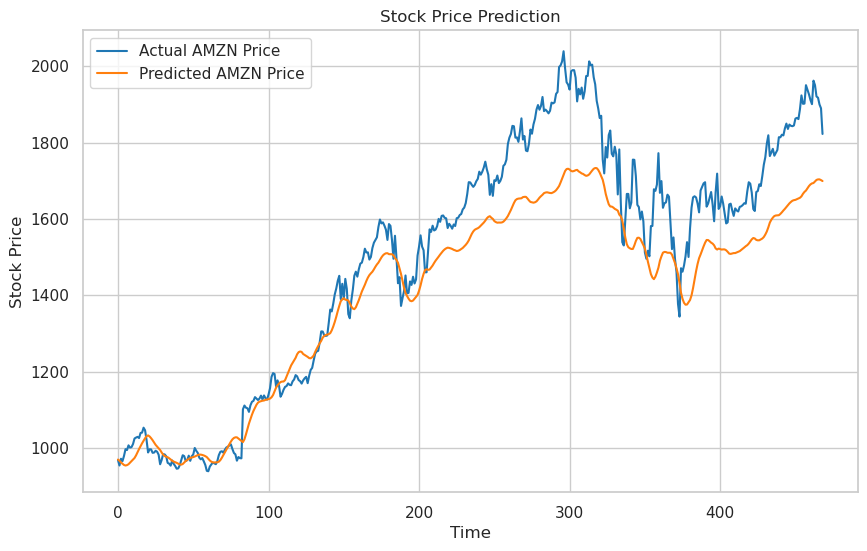

In [54]:
# Make predictions
predicted_prices = model.predict(X_test)

# Invert scaling to get actual price predictions
predicted_prices_actual = scaler.inverse_transform(predicted_prices)

# Evaluate the model using a suitable metric, like Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predicted_prices)
print(f'Mean Squared Error: {mse}')

# Post-Evaluation: Analyzing Predictions
# Compare predicted_prices_actual with the actual prices (also scaled back to original)
actual_prices = scaler.inverse_transform(y_test)

# Plotting the results (for visualization, if needed)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(actual_prices[:, 0], label='Actual AMZN Price')  # Example for AMZN
plt.plot(predicted_prices_actual[:, 0], label='Predicted AMZN Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

# Note: The above plot is an example for AMZN. You can create similar plots for DPZ, BTC, and NFLX.

# Saving Model (if needed)
model.save('stock_price_prediction_model.h5')

# To use the model for further predictions, one can load it and use model.predict on new data.


****
In this part of the project, I focused on predicting the direction of stock price movements (up or down) for AMZN, DPZ, BTC, and NFLX using Logistic Regression. After normalizing the stock price data, I created a time series dataset with a defined time step of 100. A binary classification approach was adopted, where I labeled price movements as '1' if the price increased the next day (above a set threshold) and '0' otherwise.

For each stock, I split the dataset into training and testing sets, trained a Logistic Regression model on the training set, and then predicted the probability of price increases on the test set. To evaluate the model's performance, I calculated the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) for each stock. The ROC curves were plotted to visually assess the model's ability to distinguish between the two classes (price up or down) for each stock.

Finally, I displayed the AUC scores, which provide a single metric summarizing the model's effectiveness in classifying price movements for each stock. The AUC values closer to 1 indicate better predictive performance, while values closer to 0.5 suggest no predictive ability.

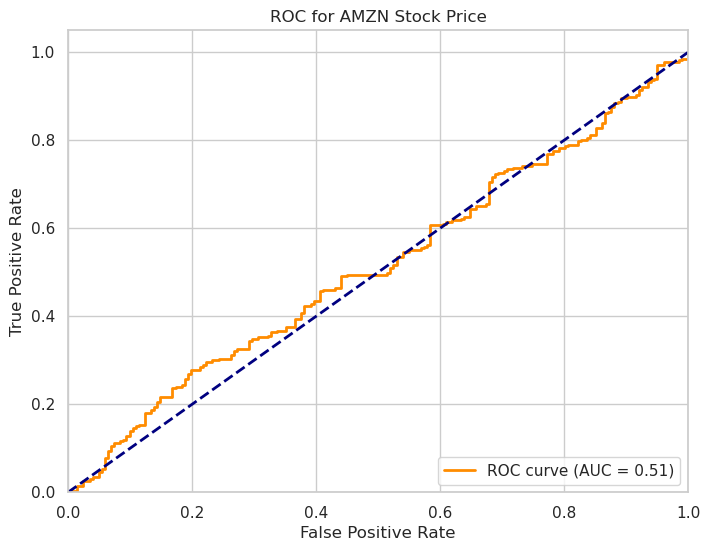

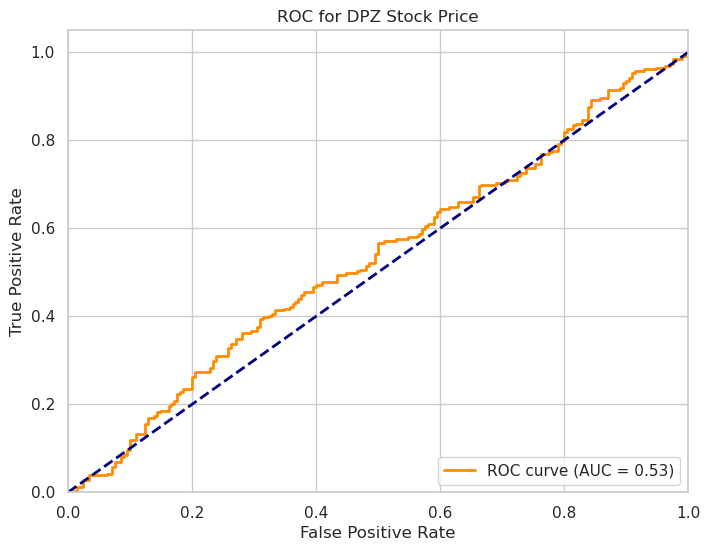

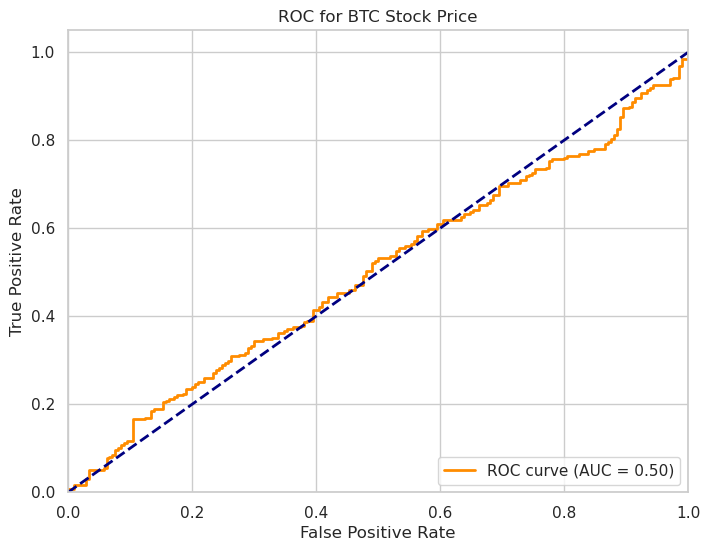

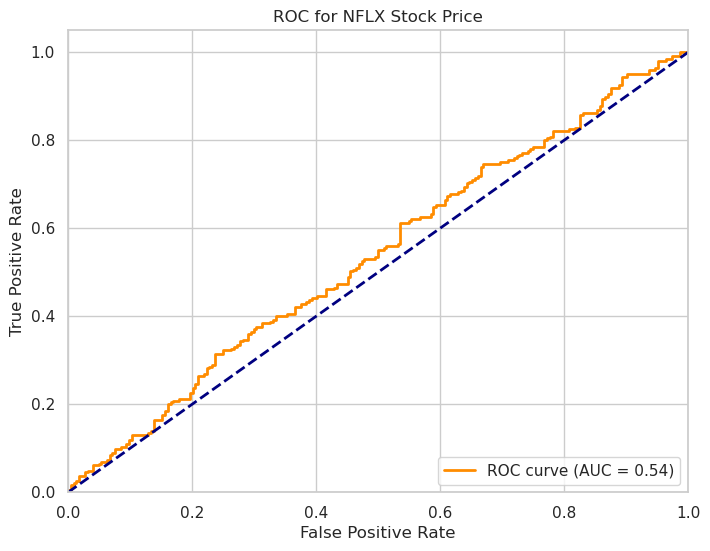

AUC for AMZN Stock Price: 0.51
AUC for DPZ Stock Price: 0.53
AUC for BTC Stock Price: 0.50
AUC for NFLX Stock Price: 0.54


In [55]:
# Load the data
df = pd.read_csv("dataset.csv")

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['AMZN', 'DPZ', 'BTC', 'NFLX']])

# Create the time series data
time_step = 100
X, y = create_dataset(scaled_data, time_step)

# Define the threshold for classification
threshold = 0.0  # Define your threshold here

# Create a dictionary to store ROC AUC scores for each company
roc_auc_scores = {}

# Iterate through each company
for company in ['AMZN', 'DPZ', 'BTC', 'NFLX']:
    # Create binary classification labels based on the threshold
    df[f'{company}_Price_Up'] = (df[company].shift(-1) > df[company])

    # Splitting the dataset into training and testing sets for the current company
    train_size = int(len(X) * 0.67)
    test_size = len(X) - train_size
    X_train, X_test = X[:train_size], X[train_size:]
    y_train = df[f'{company}_Price_Up'][:train_size]
    y_test = df[f'{company}_Price_Up'][train_size:]

    # Train a Logistic Regression model
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train.reshape(-1, 4 * time_step), y_train)

    # Predict probabilities for the test set
    y_prob = logistic_model.predict_proba(X_test.reshape(-1, 4 * time_step))[:, 1]

    # Ensure that y_test and y_prob have the same length
    min_len = min(len(y_test), len(y_prob))
    y_test = y_test[:min_len]
    y_prob = y_prob[:min_len]

    # Calculate ROC curve and AUC for the current company
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[company] = roc_auc

    # Plot ROC curve for the current company
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {company} Stock Price')
    plt.legend(loc="lower right")
    plt.show()

# Print AUC scores for each company
for company, roc_auc in roc_auc_scores.items():
    print(f'AUC for {company} Stock Price: {roc_auc:.2f}')
